# Fairness Week 1: University admissions


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">How to use this notebook</p>
    <div style="padding: 0 0 2px 10px;">

Simply read the text and **follow the instructions**.  
This notebook contains **code cells**, which can be modified and must be **executed** to see the result of their content.  
To execute a cell, select it and click on the play button (▶) in the tool  bar, or type `Shift + Enter` or `Ctr + Enter`.  

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important!  

Notebook by Maxime Lelièvre and the Responsible software team (2024).

Exercises adapted from "College Admission Algorithm" by Natalie Garrett and Casey Fiesler, used under license CC BY 4.0.  
Source: https://www.internetruleslab.com/ethicsbased-computer-science-assignments<br/>
Reference: Fiesler, C., Friske, M., Garrett, N., Muzny, F., Smith, J. J., & Zietz, J. (2021). Integrating Ethics into Introductory Programming Classes. Proceedings of the 52nd ACM Technical Symposium on Computer Science Education, 1027–1033. https://doi.org/10.1145/3408877.3432510

Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

---

# Introduction
Welcome to the Week 3 exercise session of Responsible Software!

Why and how can algorithms produce inequality outcomes? Why and how can algorithms be biased? A growing body of research shows that algorithmic bias is in play in every aspect of modern life and has substantial, far-reaching impact on our work environment, private life and culture.

In this exercise session, we will make an introduction on how bias can occur in the design and development of software and apply some tools and techniques to mitigate bias in algorithms and data.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Learning goals</p>
    <div style="padding: 0 0 2px 10px;">

**What will be covered:**
- Part 1: Crafting the selection process of college admissions
- Part 2: College admissions in Berkeley

**By the end of the session you will be able to:**
- ✅  describe basic situations where fairness issues can occur
- ✅  identify unfair situations and the different categories of unfairness sources
- ✅  apply some simple techniques to mitigate unfair situations
        
</div></div>

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from res.utils import *
from res.tests import *

# Part 1: Crafting the selection process of college admissions 

---

The college admissions process involves a lot of types of data from prospective students to make decisions. With the number of applicants increasing, more and more colleges, especially in the USA, are relying on algorithms to select which applications should receive more intensive human review. An algorithm could use quantitative data—such as the grades obtained or the score of national exams—to provide initial recommendations. In fact, there is more data available than ever. [Many colleges even track data about prospective student engagement](https://www.wsj.com/articles/the-data-colleges-collect-on-applicants-11548507602) — e.g., whether they open emails, visit the college website, engage on social media, etc. This creates a “demonstrated interest” value. 
 
[Based on a recent survey of college admissions officers](https://www.insidehighered.com/admissions/article/2018/11/12/new-data-admissions-including-application-trends-early-decision-and), we know some of the weights that humans tend to give to these different types of data.  Your task will be to create a program that iterates through a list of data points and provides a recommendation for which prospective students are likely to be the best candidates for admission.
 
Prospective student data is organized in the admission_algorithms_dataset.csv file such that the data for each student is on one row. Note that the data is coming from the USA.

| features | value range | description
|----------|----------|--------|
|  SAT score  | [0,1600]  | standardized test taken in the US to measure students' abilities before they go to college |
| GPA  | [0,5]   | sum of all the course grades throughout the high school career divided by the total number of credits |
| Interest   | [0,10]  | from very low to very high interest: prediction of student engagement by tracking whether they open emails, visit the college website, engage on social media |
| High School Quality   | [0,10]   | from very low-quality to very high-quality high school |
| Semester 1,2,3,4   | grade over 100 | average grade for semester 1,2,3,4 |

## Part 1.1: Implementing the algorithm

### Problem 1: Quick pre-processing

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to load the dataset and see its first rows.

</div></div>

In [2]:
df = load_dataset()
df.head()

Student     SAT   GPA  Interest  High School Quality  \
0       Abbess Horror   1300.0  3.61      10.0                  7.0   
1     Adele Hawthorne   1400.0  3.67       0.0                  9.0   
2  Adelicia von Krupp    900.0  4.00       5.0                  2.0   
3       Adriana Soria   1360.0  3.19       0.0                  9.0   
4     Adriana Princess  1180.0  2.93       2.0                  7.0   

   Semester 1  Semester 2  Semester 3  Semester 4  
0        95.0        86.0        91.0        94.0  
1        97.0        83.0        85.0        86.0  
2        88.0        92.0        83.0        72.0  
3        90.0        85.0        97.0        87.0  
4        93.0        81.0        90.0        87.0

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0px 10px 10px;">

Normalize both SAT and GPA so that all the data (except the semesters' grades) are on a 0 to 10 scale. 

To do this, divide the SAT score by 160, and multiply the GPA by 2.
You must add two columns to the original dataframe: `SAT_norm` and `GPA_norm`.


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Note</p>
    <div style="padding: 0 0 2px 10px;">
        
**Why normalize?** There are 3 main reasons:
- **Consistency:** Normalizing data helps bring all the variables onto a similar scale, ensuring consistency for comparison and analysis.
- **Fair Comparison:** It prevents biases that might arise from variables being on different scales. For instance, a larger scale might unfairly influence calculations or models.
- **Interpretability:** Normalization makes data more interpretable and easier to understand by scaling it within a standardized range.
        
</div></div></div></div>

In [3]:
def normalization(df):
    """ normalizes the columns SAT and GPA of the dataframe 
    Arguments:
    - df: original dataframe 
    Returns:
    - dataframe with 2 new columns with the SAT and GPA normalized: SAT_norm and GPA_norm
    """
    ### YOUR CODE HERE ###
    df['SAT_norm'] = df['SAT']/160 # SOLUTION
    df['GPA_norm'] = 2*df['GPA'] # SOLUTION
    ######################
    return df

df= normalization(df)
df.head()

Student     SAT   GPA  Interest  High School Quality  \
0       Abbess Horror   1300.0  3.61      10.0                  7.0   
1     Adele Hawthorne   1400.0  3.67       0.0                  9.0   
2  Adelicia von Krupp    900.0  4.00       5.0                  2.0   
3       Adriana Soria   1360.0  3.19       0.0                  9.0   
4     Adriana Princess  1180.0  2.93       2.0                  7.0   

   Semester 1  Semester 2  Semester 3  Semester 4  SAT_norm  GPA_norm  
0        95.0        86.0        91.0        94.0     8.125      7.22  
1        97.0        83.0        85.0        86.0     8.750      7.34  
2        88.0        92.0        83.0        72.0     5.625      8.00  
3        90.0        85.0        97.0        87.0     8.500      6.38  
4        93.0        81.0        90.0        87.0     7.375      5.86

**Test** your code with the cell below!

In [4]:
test(normalization) 

✅ You passed the test!


### Problem 2: Prospective student score

Your idea for this selection algorithm is to compute an aggregate score that takes into account the various variables that you have on the prospective students, then to set a threshold and select only students who have a score above the threshold. You will therefore follow two steps:

1. Compute the aggregate score for all students.
2. Select students who have a score above the threshold.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

You have analyzed the most relevant features for the admission process and want to write a function that calculates an overall score for each student as a weighted sum with the provided weights in the cell code below (see the meaning of each weight in comments).

The function `calculate_student_score` should:
- take a dataframe as a parameter and calculate an overall score (over 10) for each student based on the corresponding weights above,
- add the `Student score` as a new column to the dataframe and return the dataframe. The values within this column should be rounded to two decimal places (see function `round`).

</div></div>

In [5]:
coeff = [0.3,0.4,0.1,0.2] # [SAT coeff, GPA coeff, Interest coeff, High school quality coeff]

def calculate_student_score(df, coeff):
    """ computes the student score of each student and adds them as a new column to the dataframe

    Arguments:
    - df: dataframe with the SAT and GPA normalized
    - coeff: coefficients to compute the student score ([SAT, GPA, Interest, High School Quality])

    Returns:
    - dataframe with the new column 'Student score'
    """
    ### YOUR CODE HERE ###
    # BEGIN SOLUTION
    df['Student score'] = coeff[0]*df['SAT_norm'] + coeff[1]*df['GPA_norm'] + coeff[2]*df['Interest'] + coeff[3]*df['High School Quality'] 
    df['Student score'] = df['Student score'].round(2)
    # END SOLUTION
    ######################
    return df

df = calculate_student_score(df, coeff)
df.head()

Student     SAT   GPA  Interest  High School Quality  \
0       Abbess Horror   1300.0  3.61      10.0                  7.0   
1     Adele Hawthorne   1400.0  3.67       0.0                  9.0   
2  Adelicia von Krupp    900.0  4.00       5.0                  2.0   
3       Adriana Soria   1360.0  3.19       0.0                  9.0   
4     Adriana Princess  1180.0  2.93       2.0                  7.0   

   Semester 1  Semester 2  Semester 3  Semester 4  SAT_norm  GPA_norm  \
0        95.0        86.0        91.0        94.0     8.125      7.22   
1        97.0        83.0        85.0        86.0     8.750      7.34   
2        88.0        92.0        83.0        72.0     5.625      8.00   
3        90.0        85.0        97.0        87.0     8.500      6.38   
4        93.0        81.0        90.0        87.0     7.375      5.86   

   Student score  
0           7.73  
1           7.36  
2           5.79  
3           6.90  
4           6.16

**Test** your code with the cell below!

In [6]:
test_result(calculate_student_score, df)

✅ You passed the test !


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Now your goal is to select students who have a score above the threshold.  
        
Write a function `apply_selection_base` that:
- adds a column `selected_base` to the dataframe with **True** if the student has a `Student score` of 6 or higher and **False** otherwise.

**Note**: Check out the tutorial `tutorial_booleans.ipynb` if you are not very familiar with booleans with Pandas DataFrames (~3 min).
</div></div>

In [7]:
def apply_selection_base(df):
    """ applies a basic selection based on the student score and adds a column to the dataframe

    Arguments:
    - df: dataframe with the SAT and GPA normalized and the Student score

    Returns:
    - df: dataframe with one added column 'selected_base'
    """
    ### YOUR CODE HERE ###
    # BEGIN SOLUTION
    df['selected_base'] = df['Student score'] >= 6
    # END SOLUTION
    ######################
    return df

df = apply_selection_base(df)
df.head()

Student     SAT   GPA  Interest  High School Quality  \
0       Abbess Horror   1300.0  3.61      10.0                  7.0   
1     Adele Hawthorne   1400.0  3.67       0.0                  9.0   
2  Adelicia von Krupp    900.0  4.00       5.0                  2.0   
3       Adriana Soria   1360.0  3.19       0.0                  9.0   
4     Adriana Princess  1180.0  2.93       2.0                  7.0   

   Semester 1  Semester 2  Semester 3  Semester 4  SAT_norm  GPA_norm  \
0        95.0        86.0        91.0        94.0     8.125      7.22   
1        97.0        83.0        85.0        86.0     8.750      7.34   
2        88.0        92.0        83.0        72.0     5.625      8.00   
3        90.0        85.0        97.0        87.0     8.500      6.38   
4        93.0        81.0        90.0        87.0     7.375      5.86   

   Student score  selected_base  
0           7.73           True  
1           7.36           True  
2           5.79          False  
3           6.90           True  
4           6.16           True

In [8]:
test_result(apply_selection_base, df)

✅ You passed the test !


### Problem 3: Looking for outliers

Consider ways that this algorithm might systematically miss certain kinds of edge cases. For example, what if a student has a 0 for demonstrated interest because they do not use social media or do not have access to a computer at home? What if a student has a very high GPA but their SAT score is low enough to bring their score down; could this mean that they had a single bad test taking day?

In the following, your goal is to improve the inclusiveness of your selection process by taking into account these different edge cases into your selection algorithm. For this you will need to use boolean logic with Pandas Dataframes.

You will again go through two steps:
* identify the outliers
* take into account the outlier information in your selection function

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Write a function `is_outlier` that:
- checks for certain kinds of outliers such as:
    - a demonstrated interest score of 0.
    - a normalized GPA that is more than 2 points higher than the normalized SAT score. 
- adds a column `is_outlier` to the dataframe with **True** if one of the two conditions above is true, and **False** otherwise.

</div></div>

In [9]:
def is_outlier(df):
    """ checks for certain kinds of outliers and adds a column to the dataframe accordingly

    Arguments:
    - df: dataframe with all the added columns so far
    
    Returns:
    - df: dataframe with the added column `is_outlier`
    """
    ### YOUR CODE HERE ###
    # BEGIN SOLUTION
    df['is_outlier'] = (df['Interest'] == 0) | (df['GPA_norm'] > df['SAT_norm'] + 2)
    # END SOLUTION
    ######################
    return df

df = is_outlier(df)
df.head()

Student     SAT   GPA  Interest  High School Quality  \
0       Abbess Horror   1300.0  3.61      10.0                  7.0   
1     Adele Hawthorne   1400.0  3.67       0.0                  9.0   
2  Adelicia von Krupp    900.0  4.00       5.0                  2.0   
3       Adriana Soria   1360.0  3.19       0.0                  9.0   
4     Adriana Princess  1180.0  2.93       2.0                  7.0   

   Semester 1  Semester 2  Semester 3  Semester 4  SAT_norm  GPA_norm  \
0        95.0        86.0        91.0        94.0     8.125      7.22   
1        97.0        83.0        85.0        86.0     8.750      7.34   
2        88.0        92.0        83.0        72.0     5.625      8.00   
3        90.0        85.0        97.0        87.0     8.500      6.38   
4        93.0        81.0        90.0        87.0     7.375      5.86   

   Student score  selected_base  is_outlier  
0           7.73           True       False  
1           7.36           True        True  
2           5.79          False        True  
3           6.90           True        True  
4           6.16           True       False

**Test** your code with the cell below!

In [10]:
test(is_outlier)

✅ You passed the test!


Now that you know which students are outliers, you can take that information into account in your selection function.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Write a function `apply_selection_improved` that:
- checks the two following conditions:
    - the student has a `Student score` of 6 or higher.
    - the student is an outlier and has a `Student score` of 5 or higher.
- adds a column `selected_improved` to the dataframe with **True** if one of the two conditions above is true, and **False** otherwise.

</div></div>

In [11]:
def apply_selection_improved(df):
    """ applies an improved selection while adding a column to the dataframe

    Arguments:
    - df: dataframe with all the added columns so far

    Returns:
    - df: dataframe with the added column 'selected_improved'
    """
    ### YOUR CODE HERE ###
    # BEGIN SOLUTION
    df['selected_improved'] = (df['Student score'] >= 6) | ((df['is_outlier'] == True) & (df['Student score'] >= 5))
    # END SOLUTION
    ######################
    return df

df = apply_selection_improved(df)
df.head()

Student     SAT   GPA  Interest  High School Quality  \
0       Abbess Horror   1300.0  3.61      10.0                  7.0   
1     Adele Hawthorne   1400.0  3.67       0.0                  9.0   
2  Adelicia von Krupp    900.0  4.00       5.0                  2.0   
3       Adriana Soria   1360.0  3.19       0.0                  9.0   
4     Adriana Princess  1180.0  2.93       2.0                  7.0   

   Semester 1  Semester 2  Semester 3  Semester 4  SAT_norm  GPA_norm  \
0        95.0        86.0        91.0        94.0     8.125      7.22   
1        97.0        83.0        85.0        86.0     8.750      7.34   
2        88.0        92.0        83.0        72.0     5.625      8.00   
3        90.0        85.0        97.0        87.0     8.500      6.38   
4        93.0        81.0        90.0        87.0     7.375      5.86   

   Student score  selected_base  is_outlier  selected_improved  
0           7.73           True       False               True  
1           7.36           True        True               True  
2           5.79          False        True               True  
3           6.90           True        True               True  
4           6.16           True       False               True

**Test** your code with the cell below!

In [12]:
test_result(apply_selection_improved, df) 

✅ You passed the test !


## Part 1.2: Analyzing the quality of the algorithm

### Question 1: How fair is our algorithm?

In a technology-driven world where software systems impact various aspects of people's lives, software designers stand as the first and most critical line of defense to avoid inappropriate or unfair outcomes. Creating fair algorithms can be complicated, requiring more than simply avoiding the use of features that distinguish groups we wish to treat equally — called `protected attributes`. In fact, many algorithms that do not use any demographic features such as gender or ethnicity can still produce results that show clear discrimination. These biased results are often caused by the existence of `proxy variables` — one or more variables that encode the protected attribute with a substantial degree of accuracy. For example, a zip code is a widely accepted proxy that can often reveal socioeconomic status or ethnicity.

In the dataset at hand, **High School Quality** could be a proxy for socioeconomic status or ethnicity. The articles below in the `Articles` section shed light on serious fairness issues, especially considering that schools are usually funded by public funds. 

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Articles</strong></p>
    <div style="padding: 0 0 2px 10px;">

- In the [USA](https://www.shankerinstitute.org/segfunding), "school districts rely heavily on local property tax revenue, which means where one lives—particularly in which district—in no small part determines how well one’s neighborhood’s schools are funded. The mutually dependent relationship between economic and racial/ethnic segregation simultaneously depresses revenue and increases costs in racially isolated districts, creating a self-sustaining cycle of unequal opportunity and unequal outcomes."
- In [Switzerland](https://www.letemps.ch/suisse/legalite-chances-passe-un-redecoupage-zones-scolaires), the composition of lower secondary schools mirrors the social and ethnic inequalities in the neighborhoods.

</div></div>
<br/>

In this section, you are going to investigate whether the two different selection methods you implemented are fair:
- Selection base: considering only the student score
- Selection improved: considering the student score and GPA-SAT outliers

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

The cell below will show you the number (left) or percentage (right) of students who pass the selection i.e. who are allowed to enter the university, depending on the quality of their high school.  

Run the cell below to see the resulting distributions you obtain with your two selection methods: base (bottom) or improved (top).

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Note</p>
    <div style="padding: 0 0 2px 10px;">

We are segmenting the feature  `High School Quality` (HSQ) in 3 levels: high, mid, low.

</div></div><br/></div></div>

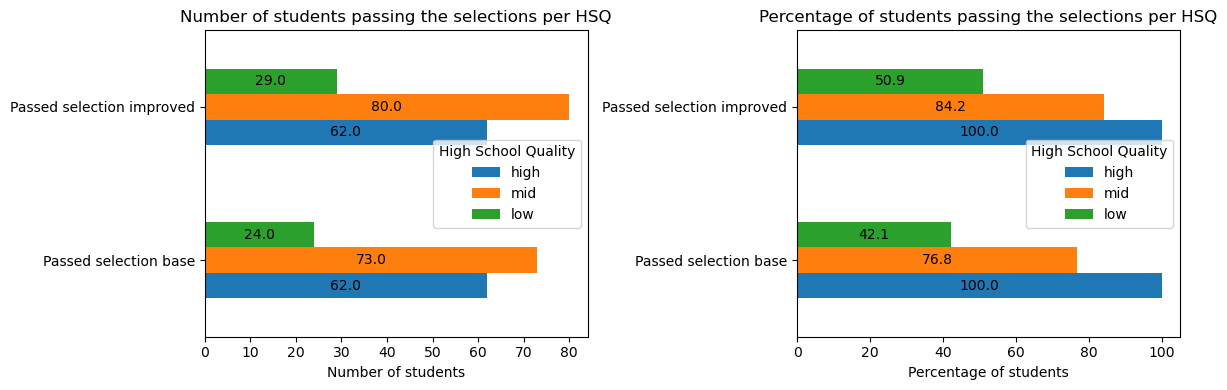

In [13]:
# segmenting the High School Quality feature by grouping: 1-3 as low, 4-7 as mid and 8-10 as high
df['High School Quality'].replace({0: "low", 1: "low", 2: "low", 3: "mid", 4: "mid", 5: "mid", 6: "mid", 7: "mid", 8: "high", 9: "high", 10: "high"}, inplace=True)

# plotting the number and percentage of students passing the selection, by High School Quality segment
selection_summary, selection_summary_perct = update_lists_passing_students(df)
plot_selection(selection_summary, selection_summary_perct)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

Do the results look fair according to you?

- Yes
- No

Why? On which criteria do you base your assessment?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
On the right-side graph, we can clearly see that a student coming from a lower-quality high school has almost half as many chances to be accepted than a student from a higher-quality high school.  
It is also interesting to note that students coming from a higher-quality high school have 100% chance to be accepted.  
Students from lower-quality high schools get slightly more chances with the improved selection whereas students from mid-quality high schools get slightly less chances.

If we define **fairness** in this context as having equal acceptance rates among groups with different high school quality, then our selection here cannot be said to be fair.    
This notion of fairness is called *demographic parity*: an algorithm is deemed fair if its results are independent from a given demographic attribute (in this case fair means equal acceptance rates among different high school quality groups).  

In the context of university admissions, different people may have differing opinions in terms of what would be 'fair'.  
Not only is fairness contextual, there are also different ways to define and measure it, which we will review in the lecture.  
Did you have a different opinion on the fairness of your selection method?
        
</div></div>

### Question 2: Where does the unfairness come from?

We can see that the students for higher-quality high schools have way more chances to be accepted to the university, though the selection gets slightly better with the adjustments made with the second selection.

Let's explore the dataset in more detail to investigate the possible sources of unfairness.

An Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies and to check assumptions with the help of graphical representations and summary statistics.

#### **Graphical analysis**


We provide you with the function `choice_visualization` that:
- takes as input the type of visualization (**boxplot** or **histogram**) and
- outputs the visualization.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Choose the type you prefer (**boxplot** or **histogram**) and run the cell below!

</div></div>

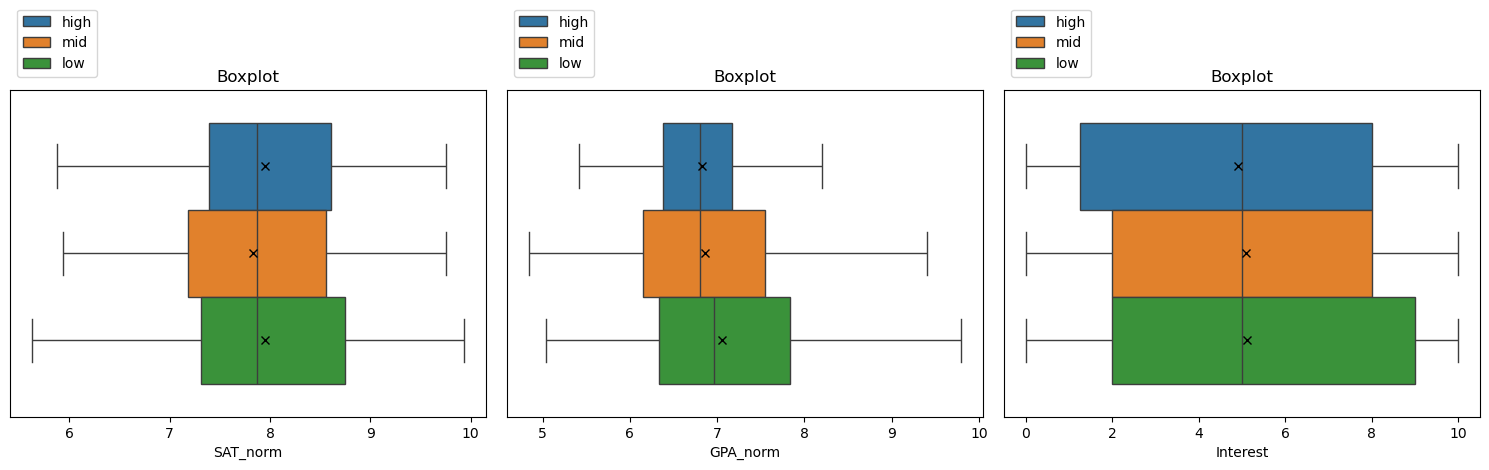

In [14]:
# BEGIN SOLUTION NO PROMPT
choice_visualization(visu_type = 'boxplot')
# END SOLUTION
""" # BEGIN PROMPT
choice_visualization(visu_type = '...')
"""; # END PROMPT

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

Which conclusion can you make based on the plots?

- Students from higher-quality high schools have better GPAs
- Students from higher-quality high schools have better SATs
- Students from higher-quality high schools have greater Interest score
- None of the above

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
None of the above.
        
The boxplots clearly show that there are almost no differences in the means, medians and ranges of the Interest, GPA and SAT variables between the low, mid or high High School Quality groups.

The histograms may be a bit hard to read but indicate only small variations in the shape of the distribution of the variables between the groups. The main visible difference on these histograms is that the mid group has more students than the other two (the orange line is higher that the other two overall).
        

</div></div>

#### **Summary statistics**

While a visual inspection is useful, it is usually recommended to also check with statistics. 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to have a quick numerical analysis of the features.

</div></div>

In [15]:
# computing the mean, median and standard deviation of SAT, GPA and Interest for the 3 High School Quality groups
analysis = df.groupby(['High School Quality'], sort=False).agg(
                      {'SAT_norm':['mean', 'median','std'],
                       'GPA_norm':['mean', 'median','std'],
                       'Interest':['mean', 'median','std']}).round(2).reindex(['high', 'mid', 'low'])

# adding borders to the resulting analysis table
analysis.style.format(precision = 2).set_table_styles([{'selector': 'th, td', 'props': [('border-style','solid'),('border-width','1px'),('border-color','lightgray')]}])

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

1) What conclusion can you make based on the table above?

- Students from higher-quality high schools have better GPAs.
- Students from higher-quality high schools have better SATs.
- Students from higher-quality high schools have greater Interest score.
- None of the above.

2) Did your conclusion change from the graphical analysis?
- Yes
- No

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
Overall, there are very few differences in mean, median and standard deviation between the groups for the different variables:  
- Students from the low group have SAT scores that are comparable to that of the high group, and since this is the results of a standardized test, it seems to indicate that the High School Quality does not make a difference in training students for this test.
- For the GPA, students from the low group have higher scores than the other two groups, which could, maybe, indicate a tendency to grade inflation in these schools.
- Students from the low group actually seem to demonstrate more interest than the other two groups.
        
The information provided by the summary statistics seem to confirm the visual inspection and show no real differences in Interest, GPA and SAT between the low, mid and high High School Quality groups.   
In other words, no bias is visible on these variables.   

So where does the unfairness of our selection algorithm come from?

</div></div>

### Question 3: Improving the fairness of the selection process

To recap we saw two things:
- the selections we implemented are not fair for students coming from lower-quality high schools.
- the distributions of the different features in the dataset are not significantly different across different high school qualities (high, mid, low) but it can still affect the selections' fairness.

In this section, you are going to explore how the selection algorithm affects students depending on their high school group and identify how you could improve the algorithm.

#### **Manual exploration**

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Modify the weights of the **Student score** to improve the selection fairness. 

We provide you with the code below to run your own experiments. **You just need to change the weights** and the visualization will help you assess the fairness.

</div></div>

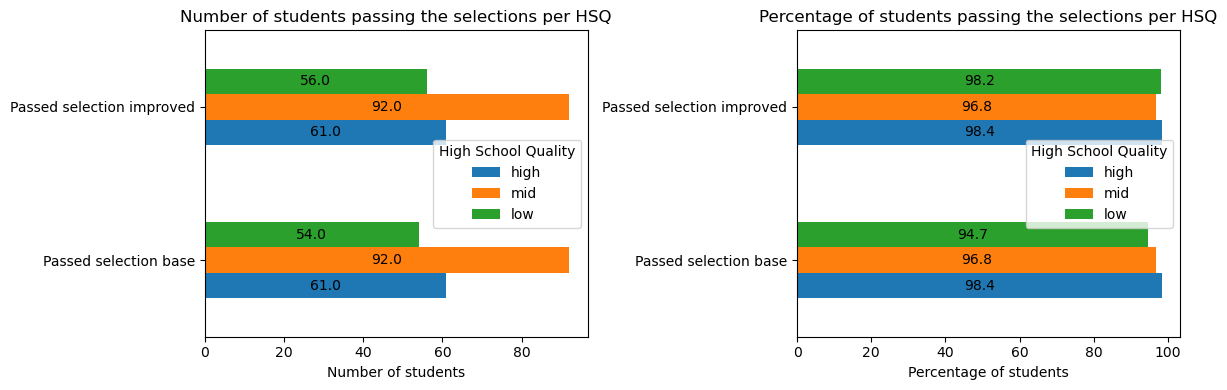

In [16]:
def change_weights_student_score(df, coeff):
    """ changes the coefficients of the student score and updates the selection accordingly
    """
    #selection base
    df = apply_selection_base(calculate_student_score(normalization(df), coeff).round(2))
    # selection improved
    df = apply_selection_improved(is_outlier(df))
    
    df['High School Quality'].replace({0: "low", 1: "low", 2: "low", 3: "mid", 4: "mid", 5: "mid", 6: "mid", 7: "mid", 8: "high", 9: "high", 10: "high"}, inplace=True)
    selection_summary, selection_summary_perct = update_lists_passing_students(df)
    
    plot_selection(selection_summary, selection_summary_perct)
        
    return selection_summary, selection_summary_perct

df_copy = load_dataset()

##### YOUR CODE HERE #########
# coeff: coefficients to compute the student score ([SAT,GPA, Interest,HSQ])
coeff = [1.0, 0.0, 0.0, 0.0]  # SOLUTION
##############################

if np.abs(np.sum(coeff) - 1) < 1e-6:
    selection_summary, selection_summary_perct = change_weights_student_score(df_copy, coeff)
else: 
    raise Exception("The sum of the coefficients must be equal to 1")

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

What do you observe from your exploration when modifying the coefficients?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
This manual observation should show you that the choice of the coefficients largely influences the fairness of the selections, which means that the unfairness we observe is actually **constructed into our Student Score** through the choice of the coefficients.  
Here is a figure which shows the distribution of the Student Score for different combinations of coefficients:
        
<br/><img src="boxplots_student_score.png" width="1400"><br/>
        
As this figure illustrates, the **coefficient for the High School Quality**, in particular, plays a substantial role in the (un)fairness of our selection process.  
This raises the question of the legitimacy of using such a criteria for selecting students, which is quite a complex question requiring a clear policy decision from the university given the potential implications.  
        
If we had not analyzed the fairness of the algorithm, this could have been implemented and applied through our algorithm to thousands of students without question.
        
Another element to note from this exploration is that, while adjusting the coefficients of the Student Score may lead to a fairer selection, it also leads to **accepting approximately 80% of applicants**, which may not be very realistic as universities generally have limited number of seats, particularly top-tier universities with a high volume of applications.

</div></div>

#### **Optimization of the coefficients**

We would like to find the coefficients that maximize the selection's fairness. The initial passing criteria being a **Student score** above 6, if every level of **High School Quality** has a Student score of 6 in average, we suppose that the selection algorithm will be fair. 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Note</p>
    <div style="padding: 0 0 2px 10px;">

- By "forcing" every level of High School Quality to have an average **Student Score** of 6 and using it as a criterion for applicant selection, we address the issue of admitting around 80% of applicants mentioned before. This approach can be compared to the Gaussian rule applied by some university professors when exams are excessively challenging, although in this case, it operates in the opposite sense.

- Given the similar distributions of SAT, GPA, and Interest across various High School Quality values (see graphical analysis before), the optimization algorithm ensures fairness in its implementation. Indeed, if the quality of the high school had an impact on the SAT of its students (for example students from high quality high schools have higher SAT in average), then "forcing" the **Student Score** to have a mean of 6 for each level of high school quality would disadvantage some students as they might have a higher **Student Score** originally. But this is not the case here as seen with the graphical and numerical analysis.

</div></div>

The optimization algorithm is defined as follows:
- We first build the matrix with 1 row per High School Quality (from 0 to 10) and one column per feature (SAT, GPA, Interest, High School Quality).
- We implement the minimization algorithm.

In [17]:
from scipy.optimize import minimize

# Define the matrices and vectors
df_initial = load_dataset()
df_initial= normalization(df_initial)
df_mean = df_initial.groupby('High School Quality').apply(lambda x: pd.Series({"mean_SAT": round(x['SAT_norm'].mean(),2),
                                                                            "mean_GPA": round(x['GPA_norm'].mean(),2),
                                                                            "mean_Interest": round(x['Interest'].mean(),2),
                                                                            "mean_HSQ": round(x['High School Quality'].median(),2),}))

A = df_mean.values
b = np.ones((10, 1)) * 6   # Target vector filled with 6

A

array([[ 7.99,  6.7 ,  5.24,  0.  ],
       [ 7.94,  7.26,  5.26,  1.  ],
       [ 7.9 ,  7.27,  4.82,  2.  ],
       [ 7.71,  7.02,  5.  ,  3.  ],
       [ 7.74,  6.94,  5.42,  4.  ],
       [ 7.97,  6.65,  5.06,  5.  ],
       [ 7.87,  7.  ,  4.77,  6.  ],
       [ 7.93,  6.71,  5.06,  7.  ],
       [ 8.22,  7.12,  6.77,  8.  ],
       [ 7.75,  6.62,  4.55,  9.  ],
       [ 7.99,  6.86,  4.33, 10.  ]])

So we have:

$$
A w \approx b 
\equiv
\begin{bmatrix}
7.99 & 6.7 & 5.24 & 0 \\
7.94 & 7.26 & 5.26 & 1 \\
7.9 & 7.27 & 4.82 & 2 \\
7.71 & 7.02 & 5 & 3 \\
7.74 & 6.94 & 5.42 & 4 \\
7.97 & 6.65 & 5.06 & 5 \\
7.87 & 7 & 4.77 & 6 \\
7.93 & 6.71 & 5.06 & 7 \\
8.22 & 7.12 & 6.77 & 8 \\
7.75 & 6.62 & 4.55 & 9 \\
7.99 & 6.86 & 4.33 & 10 \\
\end{bmatrix}  \begin{bmatrix} w_{SAT} \\ w_{GPA} \\ w_{Interest} \\ w_{HSQ}  \end{bmatrix} \approx \begin{bmatrix} 6 \\ 6 \\ 6 \\ 6 \\ 6 \\ 6 \\ 6 \\ 6 \\ 6 \\ 6 \\ 6 \end{bmatrix}
$$

The goal is to find the optimal weights $w_{SAT}, w_{GPA}, w_{Interest}, w_{HSQ}$ so that the average **Student score** is equal to 6 for every level of High School Quality.

Let's now define an objective function and solve the optimization problem.

Optimal Solution [SAT, GPA, Interest, HSQ]: [ 0.6754438   0.16585479 -0.09444297 -0.00176872]


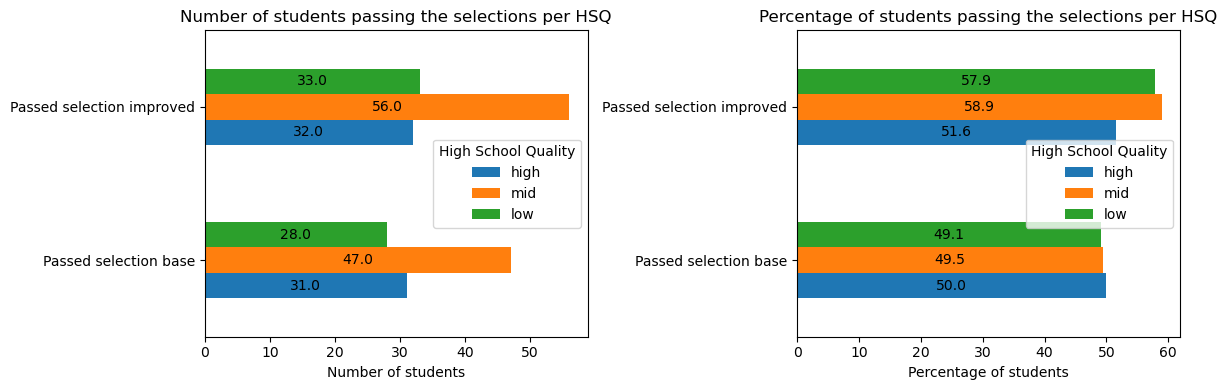

In [18]:
# Define the objective function to minimize
def objective_function(X):
    return np.linalg.norm(np.dot(A, X) - b)  # Minimize the norm of the difference

initial_guess = np.random.rand(4)  # Initial guess for X
result = minimize(objective_function, initial_guess)

print(f"Optimal Solution [SAT, GPA, Interest, HSQ]: {result.x}")

selection_summary, selection_summary_perct = change_weights_student_score(df_copy, result.x)

Note that there are multiple approaches to tackle this problem, and we've opted for a minimization method. 

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

1) What does a negative value mean for the weight associated to **High School Quality**?
- Students from higher-quality high schools will be advantaged by the selection, which raises some ethical questions.
- Students from higher-quality high schools will be disadvantaged by the selection, which is fair for everyone.
- Students from lower-quality high schools will be advantaged by the selection, which is fair for everyone.
- Students from lower-quality high schools will be disadvantaged by the selection, which raises some ethical questions.
- None of the above seems correct.

2) What do you conclude from the optimization solution?
- Compared to the other features (GPA, Interest, High School Quality), the SAT has a small impact on the student score.
- If we had to choose only two features, choosing the Interest and High School Quality would be the best choice to make the selection fair.
- Taking into account more features, in addition to SAT, GPA, Interest and High School Quality, could make the selection more fair.
- To make the selection fair, the optimization solution suggests penalizing the students from higher-quality high schools.
- None of the above.

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
1. None of the above seems correct. 
2. To make the selection fair, the optimization solution suggests penalizing the students from higher-level high schools.

The optimization results in **small negative coefficients** for the features Interest and High School Quality, which means that if 2 students have the same SAT and GPA, the one showing higher interest or coming from a higher-quality high school will have a slightly smaller Student score and thus a slightly smaller chance to be selected. This might considered an unfair disadvantage, however we have to keep in mind that these coefficients are very very small.

Actually, the coefficients resulting from the optimization seem to indicate that **more weight should be given to the SAT score** and, to a lesser extent to the GPA score, to ensure an equal representation of students from all three levels of High School Quality.

One thing to keep in mind though, is that when we have a limited number of spaces to attribute, increasing the proportion of admissions for students in the low High School Quality group necessarily means decreasing the proportion of admissions in the other groups, which might also be considered unfair. Solving this issue with a selection algorithm only means we actually ignore the social factors that play a role in access to higher education.

</div></div>

## ***Conclusion of Part 1***

One crucial aspect we've explored in this part of the notebook is the significance of variables in shaping model fairness. From the choice of scale to the very design of our algorithms, these decisions can have a profound impact on the ethical implications of our algorithm. 

In conclusion, this example of college admissions taught us three things:
- Implementing a complex selection algorithm is sometimes useless and can even make the selection more unfair. 
- Making an algorithm perfectly fair is usually impossible. A trade-off needs to be found by its designer and any choice of design might trigger other fairness issues (for instance the students from higher-level high schools that need to be penalized to have a fair selection overall).
- Finding a way to make a selection fair might be more of a social problem that a technological one. Investigating the roots of the unfairness first might be helpful.

<br/>

---

# Part 2: College admissions in Berkeley

---

In Part 1, we explored how the way we design algorithms can affect fairness.

Now, in Part 2, we'll take a closer look at another factor that can influence fairness: the data we use. We'll see how the data can have a big impact on whether our outcomes are fair or not.

We will use a dataset from Berkeley, which contains all 12,763 applicants to UC-Berkeley's graduate programs of one year. This dataset was published by UC-Berkeley researchers in an analysis to understand the possible gender bias in admissions. The dataset is made up of 12,763 rows and 3 columns as described below:

| features | values | description
|----------|----------|--------|
| Major | A, B, C, D, E, F, or Other  | An anonymized major code, equivalent to sections at EPFL. The specific majors are unknown except that A-F are the six majors with the most applicants in Fall 1973 |
| Gender | M or F  | Applicant self-reported gender |
| Admission  | Rejected or Accepted | Admission decision |

⚠️ Disclaimer: The dataset is not very recent and the categories it uses for **Gender** are out of date. We chose not to modify it since this is a public dataset.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to load the dataset and see its first rows! 

</div></div>

In [19]:
berkeley = load_berkeley_dataset()
berkeley.head()

Major Gender Admission
0      C      F  Rejected
1      B      M  Accepted
2  Other      F  Accepted
3  Other      M  Accepted
4  Other      M  Rejected

### Context

Imagine you're a professional computer scientist, and Berkeley University has a unique task for you. They need your help to create an algorithm that can sort through a large number of candidates for their upcoming admissions.
In the [Fall of 2022](https://grad.berkeley.edu/admissions/choose-berkeley/rankings-stats/#panel-1-2), Berkeley University selected 4,000 students from a pool of over 40,000 applicants. 

To streamline this process, they've provided you with data from all the applicants to UC Berkeley's graduate programs of a given year.
Your job is to use this historical data to design a sorting algorithm for their current admission process. 

Before diving into the algorithm creation, you begin by analyzing the historical data from UC Berkeley's graduate program applicants to explore possible patterns among the accepted candidates and criteria that might have influenced their admission.

You will split the analysis in two parts:
- **Fairness of representation:**  Examining who applied and got accepted allows assessing if there's an imbalanced representation in the dataset. It can give a first hint in recognizing potential biases in the historical data. 
- **Fairness of outcomes:** Looking specifically at the relations between the features (**Major**, **Gender**) and the outcome variable (**Admission**) can help us find if certain groups were accepted or rejected more often, and in which circumstances.

### Fairness of representation

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Plot the distribution of the features **Major**, **Gender** and **Admission**. 

You can use [countplots](https://seaborn.pydata.org/generated/seaborn.countplot.html) from seaborn.

</div></div>

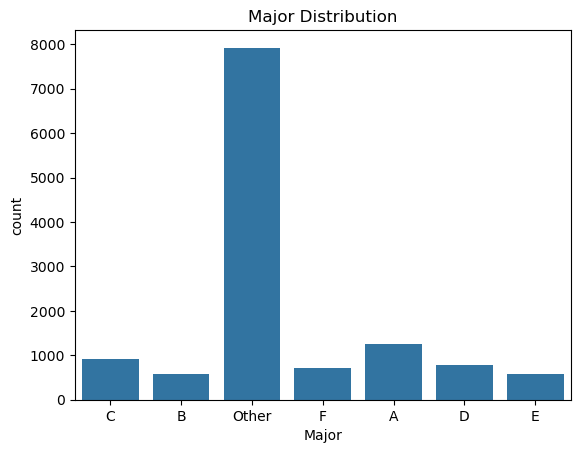

In [20]:
# Plot 1: Countplot with Major variable
### YOUR CODE HERE ###
# BEGIN SOLUTION NO PROMPT
sns.countplot(x='Major', data=berkeley)
plt.title('Major Distribution')
# END SOLUTION
""" # BEGIN PROMPT
sns.countplot(x='...', data=...)
plt.title('...')
"""; # END PROMPT
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

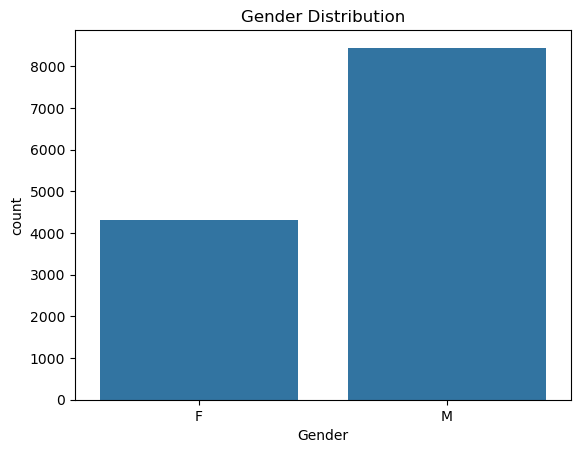

In [21]:
# Plot 2: Countplot with Gender variable
### YOUR CODE HERE ###
# BEGIN SOLUTION
sns.countplot(x='Gender', data=berkeley)
plt.title('Gender Distribution')
# END SOLUTION

Text(0.5, 1.0, 'Admission Distribution')

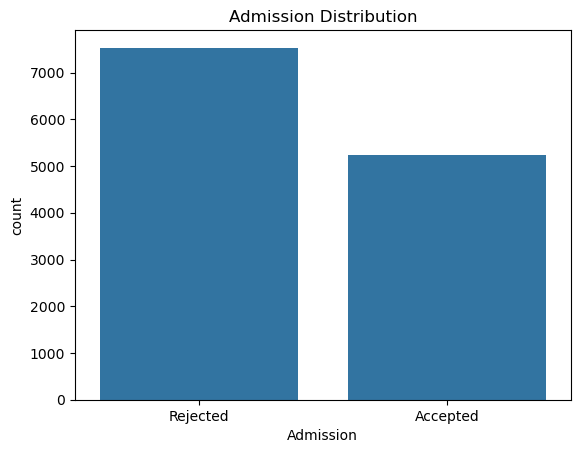

In [22]:
# Plot 3: Countplot with Admission variable
### YOUR CODE HERE ###
# BEGIN SOLUTION
sns.countplot(x='Admission', data=berkeley)
plt.title('Admission Distribution')
# END SOLUTION

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

What can you say about the distribution of the gender among the applicants? Propose an hypothesis for why it is like this.

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
We can see that there is a higher proportion of male than female applicants. Several factors could have influenced this imbalance such as:
- Societal stereotypes may influence the choice of fields or majors, leading to a higher representation of one gender over the other.
- Historical disparities hinder access, affecting gender balance in applications.
- Economic hurdles limit opportunities, skewing gender ratios in applications.

Did you identify other hypotheses?
        
</div></div>

### Fairness of outcomes

This part focuses on how college admissions (Admission) connect with different factors. Designing an admissions system based on these aspects is critical because it could create serious issues if not correctly handled. By studying past data widely and within specific departments, our goal is to detect any unfairness or bias in past admissions. This investigation aims to make sure that everyone, no matter their background, gets a fair chance during the admission process, making it more equal for all applicants.

#### **Outcomes at university level**

Look first at the outcomes of the admission process at the level of the university.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to look at the gender distribution between the students who got accepted and rejected.

</div></div>

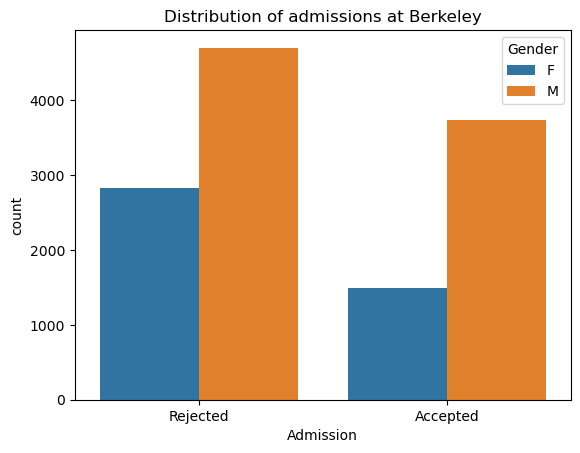

In [23]:
sns.countplot(data = berkeley, x = 'Admission', hue = 'Gender')
plt.title("Distribution of admissions at Berkeley")
plt.show()

Let's now analyze the data numerically, explicitly looking at the proportions. 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to get a summary table.

</div></div>

In [24]:
results = berkeley.groupby('Gender').apply(lambda x: pd.Series({"# Accepted": len(x['Admission']=='Accepted'),
                                                            "% Accepted": round(100*np.mean(x['Admission']=='Accepted'), 2)}))
results.head()

# Accepted  % Accepted
Gender                        
F           4321.0       34.58
M           8442.0       44.28

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

Based on the plot and table above, which gender might be treated unfairly in the past admission process? 
- Male
- Female
- None of them, the selection seems to be fair.

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
- Female

Both the graph and the table show that female applicants are less likely to be accepted compared to male applicants (difference of 10%), which raises serious fairness issues for the university. 

</div></div>

As a careful computer scientist, you want to check your conclusion by taking a closer look at each major's details.

#### **Outcomes per major**

You're aware of the dataset's imbalance, due to more men than women applying.  You thus decide to look at the proportions by gender for the different majors.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Run the cell below to look at the **proportions** of male to female applicants by admission status (Accepted or Rejected) and gender (Male or Female) in each major.

</div></div>

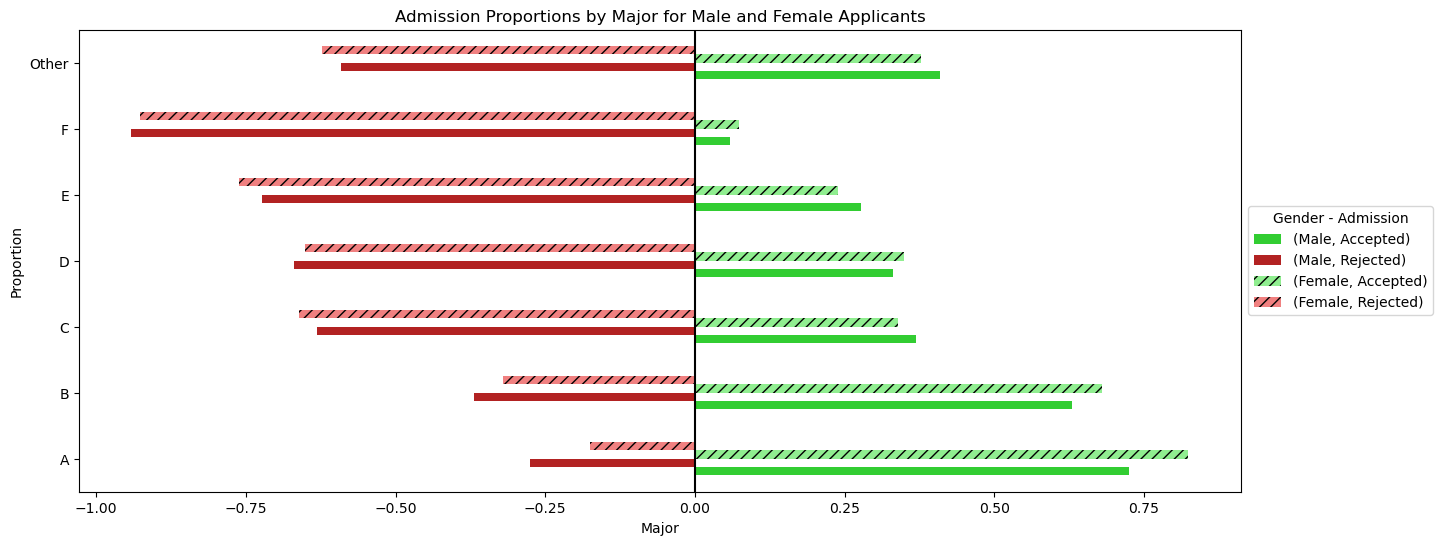

In [25]:
plot_admissions_proportions()

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

By comparing the number of majors where female applicants are disadvantaged with the number of majors where male applicants are disadvantaged, which option is true according to you?

- Male applicants suffer the most from unfairness and the difference is significant.
- Male applicants suffer the most from unfairness but the difference is not significant.
- Female applicants suffer the most from unfairness and the difference is significant.
- Female applicants suffer the most from unfairness but the difference is not significant.
- None of the above.

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
- Male applicants suffer the most from unfairness but the difference is not significant.

By looking at the plot of proportions, we see that there are 4 majors out of 7 where male applicants are disadvantaged. We can conclude that male applicants seem to be most frequently treated unfairly when we look at the admission results per major, which contradicts the first result when we view them globally. Nevertheless, we can see that the differences are pretty small for each major indicating that the unfairness is not significant.

**Note:** The term "significant" is being used informally here. In a rigorous statistical analysis, determining the significance of results involves conducting specific statistical tests and examining the associated p-values.
</div></div>

#### **Conclusion**
At the university level, we concluded that female applicants were disadvantaged in the admission process as they had 34% of chance of being accepted whereas male applicants had 44%.  
However, at the major level, we concluded that male applicants were disadvantaged in the admission process as they were more likely to be rejected in the majority of majors (4 out of 7).

These results show how complex it can be to assess the fairness of such processes.

### Improving the fairness of the selection process

Now that we have analyzed the results of prior admissions, what could we do to improve the situation?

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

Based on those results, propose a solution that could improve the fairness of the admission process at Berkeley. Give one **technical** solution (can be outside of the scope of this notebook) and one **non-technical** solution.

**Note:**
- By **technical**, we mean a solution that involves the application of specific algorithms, methodologies, or technologies to address the problem.
- By **non-technical**, we mean a solution that focuses on human-centric approaches, policies, or strategies that do not rely heavily on advanced technology or algorithms.

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
- Technical solution:
If we define fairness as having equal chances of acceptance across majors, as in the *Demographic parity* metric, we'd aim for an equal percentage of admissions for men and women in each major. This could result in more male students than female students in certain majors due to the higher number of male applicants overall.

- Non-technical solution: 
These admissions are the result of decisions made by people, e.g. in the administration offices of the different majors. Interviewing these persons to understand the process from their point of view, the challenges faced by each specific major in terms of the profiles of their applicants as well as their constraints (e.g. limits in terms of space), would be very important to improve the situation. Since the goal of an admission algorithm would be to help those in charge of this process, it is fundamental to take their inputs into account.
        
In addition, exploring the reasons behind the lower number of female applicants overall would also be essential to improve the gender balance at the university.
</div></div>

### ***Conclusion of Part 2***

The analysis of the Berkeley dataset showed us two things:
- Comparing the proportions of male and female applicants admitted, we saw that male applicants had a higher chance of being accepted (by 10%).
- Examining each major separately revealed a contrasting trend: female applicants had a higher chance of being accepted than male applicants (in 4 out of 7 majors)


The [Berkeley dataset](https://discovery.cs.illinois.edu/dataset/berkeley/) is a classic example of [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox). Note that this dataset dates back to 1973 and might not be representative of the current situation.

In short, Simpson's paradox occurs when a trend appears in different groups of data but reverses when these groups are combined. It arises due to confounding variables that distort the overall perception of relationships within the data, leading to a misleading or contradictory conclusion. Essentially, what holds true for individual groups might not hold when these groups are merged.

In our analysis, we have first assumed that, if there is a bias in the proportion of female applicants admitted, it is because of a link between gender and decision to admit. But we did not consider the prior link between gender and department to which admission is sought. The tendency of men and women to seek entry to different departments is marked, which alters the overall analysis.

What would be the best solution to make the next round of admissions more fair? Should we ensure the same chance of being accepted overall or should we ensure that each major has the same proportion of male and female applicants admitted? 

Should we ensure that 50% of the male applicants and 50% of the female applicants are accepted? Or should we ensure that overall and in each major, there are 50% of men and 50% of women? If there are less women than men applying overall, female applicants might be advantaged.

Feel free to reflect on these open-ended questions until the next lecture!

# Summary

Part 1 demonstrated how basic algorithms have the potential to generate unfair outcomes.

Part 2 emphasized that unfairness might originate from the data itself, highlighting the complexity of identifying its root causes due to the multitude of factors involved. As we will see next week, employing machine learning models trained on such biased data can perpetuate or exacerbate existing unfairness.

It's essential to understand that biases in data can stem from various sources such as historical imbalances, societal prejudices, or even inadvertent errors in data collection. When these biased datasets are used to train AI models, they can reflect and perpetuate these biases, leading to unjust outcomes and reinforcing societal inequalities. Understanding these complexities is pivotal in developing ethical software practices and strategies to mitigate biases in software systems.

## Congratulations! You have finished this notebook!